In [ ]:
### WARNING --- This takes about 20 minutes to execute fully -- only run this once to create the concatenated .csv on your local machine ###

import requests
import pandas as pd
import time

df = pd.DataFrame()
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

for year in years:
    print(f'Fetching data for {year}...')

    ev_all = pd.read_csv(f'EVLAcsv/EV - {year}.csv')

    evlist = list(ev_all['Exit Velocity (MPH)'])

    for ev in evlist:

        url = f"https://baseballsavant.mlb.com/statcast_hit_probability?value={ev}&type=ev&year={year}"

        response = requests.request("GET", url)

        df_new = pd.DataFrame(response.json())
        df_new['exit_velo'] = ev
        df_new['year'] = year
        
        df = pd.concat([df_new, df])
        time.sleep(1)

    #df.info()

df = df.drop(['rowId','url'], axis=1)

df.to_csv('EVLAcsv/evla_all.csv', index=False)

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np

data = pd.read_csv('EVLAcsv/evla_all.csv')

#data.info()

# creates new column defining the result of AB based on hit type

def Result(row):
    if row['1B'] == 1:
        return '1B'
    elif row['2B'] == 1:
        return '2B'
    elif row['3B'] == 1:
        return '3B'
    elif row['HR'] == 1:
        return 'HR'
    else:
        return 'other'

#print(data)

# cleaning up column naming scheme for aesthetics/clartiy

data.rename(columns={'n_hip':'BBA', 'n_hits':'H', 'hits_per_hip':'AVG', 'woba':'wOBA', 'n_hits_1b':'1B', 'n_hits_2b':'2B', 'n_hits_3b':'3B',
            'n_hits_hr':'HR', 'hits_1b_per_hip':'%1B', 'hits_2b_per_hip':'%2B', 'hits_3b_per_hip':'%3B', 'hits_hr_per_hip':'%HR',
            'avg_distance':'Dist', 'value':'LA', 'exit_velo':'EV', 'h_type':'Result'}, inplace=True)

data = data.assign(Result=data.apply(Result, axis=1))


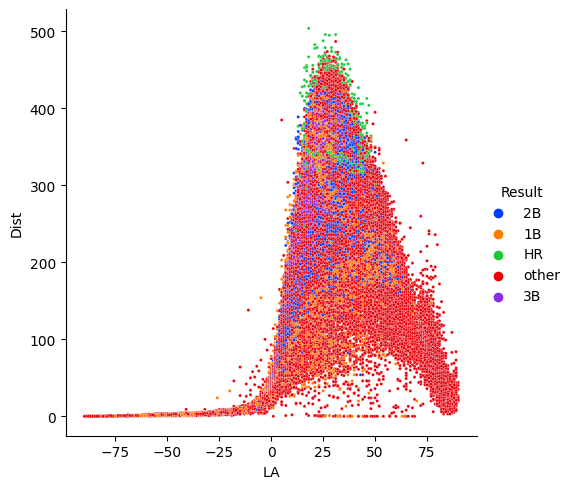

In [20]:
# trying to create a plot for different hit types for a given year

#sns.relplot(data=data, x='LA', y='AVG', s=5, marker='o', palette='bright', hue='year', alpha=0.5)
#g = sns.FacetGrid(data, col='year', col_wrap=4, hue='year')
#g.map(sns.scatterplot, 'EV','Dist', s=5, marker='o')

#g2 = sns.FacetGrid(data, hue='Result', xlim=(-10,80))
#g2.map(sns.scatterplot, 'LA','Dist', s=5, marker='o')

p1 = sns.relplot(data=data, x='LA', y='Dist', s=5, marker='o', palette='bright', hue='Result')
#plot.map(sns.scatterplot, 'launch_angle','avg_distance', s=10, marker='.')

In [ ]:
sns.histplot(df, x=)